In [2]:
import os
import re
import string
import json
import pandas as pd
from openai import OpenAI
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np

# Comparison between different models
1. Baseline with GPT 3.5 finetuned (ft:gpt-3.5-turbo-1106:ninjatech-ai-dev::8sQyzUKb)
2. Baseline with GPT 4
3. Prompt2Code with GPT3.5
4. Prompt2Code with GPT4

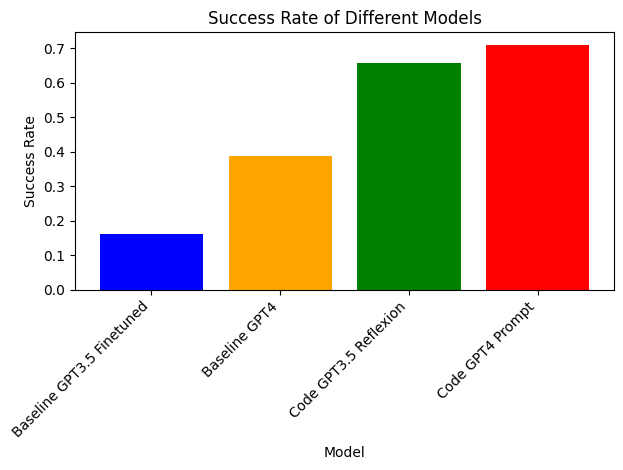

In [12]:

# Define the datasets

result_baseline_with_GPT3_5_finetuned = [
    {'success': 8, 'wrong_answer': 38, 'error': 0},
    {'success': 7, 'wrong_answer': 39, 'error': 0},
    {'success': 4, 'wrong_answer': 42, 'error': 0},
    {'success': 10, 'wrong_answer': 36, 'error': 0},
    {'success': 8, 'wrong_answer': 38, 'error': 0}
]

result_baseline_with_GPT4 = [
    {'success': 19, 'wrong_answer': 27, 'error': 0},
    {'success': 16, 'wrong_answer': 30, 'error': 0},
    {'success': 15, 'wrong_answer': 31, 'error': 0},
    {'success': 20, 'wrong_answer': 26, 'error': 0},
    {'success': 19, 'wrong_answer': 27, 'error': 0}
]

result_prompt_GPT3_5_reflexion = [
    {'success': 30, 'wrong_answer': 16, 'error': 0},
    {'success': 28, 'wrong_answer': 18, 'error': 0},
    {'success': 33, 'wrong_answer': 13, 'error': 0},
    {'success': 33, 'wrong_answer': 13, 'error': 0},
    {'success': 27, 'wrong_answer': 19, 'error': 0}
]

# 3 * 46
result_prompt_GPT4 = [
    {'success': 32, 'wrong_answer': 12, 'error': 2},
    {'success': 34, 'wrong_answer': 11, 'error': 1},
    {'success': 32, 'wrong_answer': 10, 'error': 4}
]


# Calculate average success rate and average error rate for each list
def calculate_average_rates(result_list):
    total_records = len(result_list)
    if total_records == 0:
        return 0, 0
    total_questions = sum(result_list[0].values())
    success_sum = sum(result['success'] for result in result_list)
    error_sum = sum(result['error'] for result in result_list)
    average_success_rate = success_sum / total_records/total_questions
    average_exec_rate = 1- error_sum / total_records/total_questions
    return average_success_rate, average_exec_rate

success_baseline_GPT3_5, execution_baseline_GPT3_5 = calculate_average_rates(result_baseline_with_GPT3_5_finetuned)
success_baseline_with_GPT4, execution_baseline_with_GPT4 = calculate_average_rates(result_baseline_with_GPT4)
success_code_GPT3_5_reflexion, execution_code_GPT3_5_reflexion = calculate_average_rates(result_prompt_GPT3_5_reflexion)
success_code_GPT4, execution_code_GPT4 = calculate_average_rates(result_prompt_GPT4)


# Calculate success rates for each model
success_rates = {
    "Baseline GPT3.5 Finetuned": success_baseline_GPT3_5,
    "Baseline GPT4":             success_baseline_with_GPT4,
    "Code GPT3.5 Reflexion":     success_code_GPT3_5_reflexion,
    "Code GPT4 Prompt":          success_code_GPT4
}

# Plot the histogram
plt.bar(success_rates.keys(), success_rates.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Success Rate')
plt.title('Success Rate of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()